In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm 
import scipy.stats as stats

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/marcel0501/Wine/refs/heads/main/WineQT.csv")
df.describe()
Dep_var = ['fixed acidity', 'citric acid', 'residual sugar',
       'chlorides',
       'pH', 'sulphates', 'alcohol']
X = df[Dep_var]
y = df["quality"]




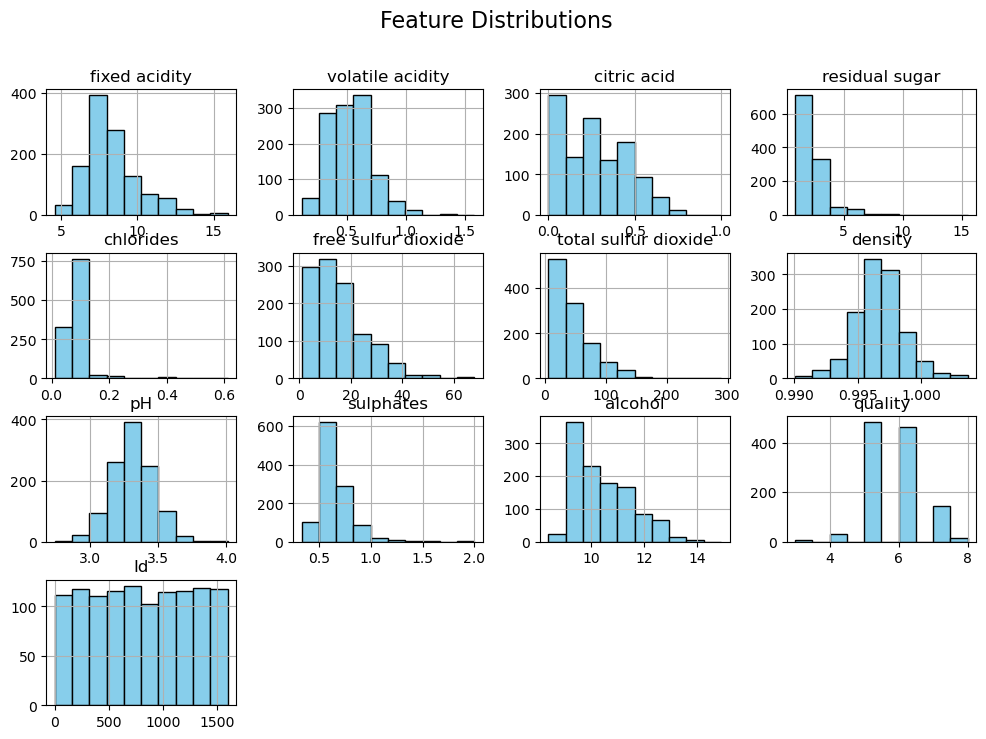

In [49]:
df.hist(figsize=(12, 8),bins = 10, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

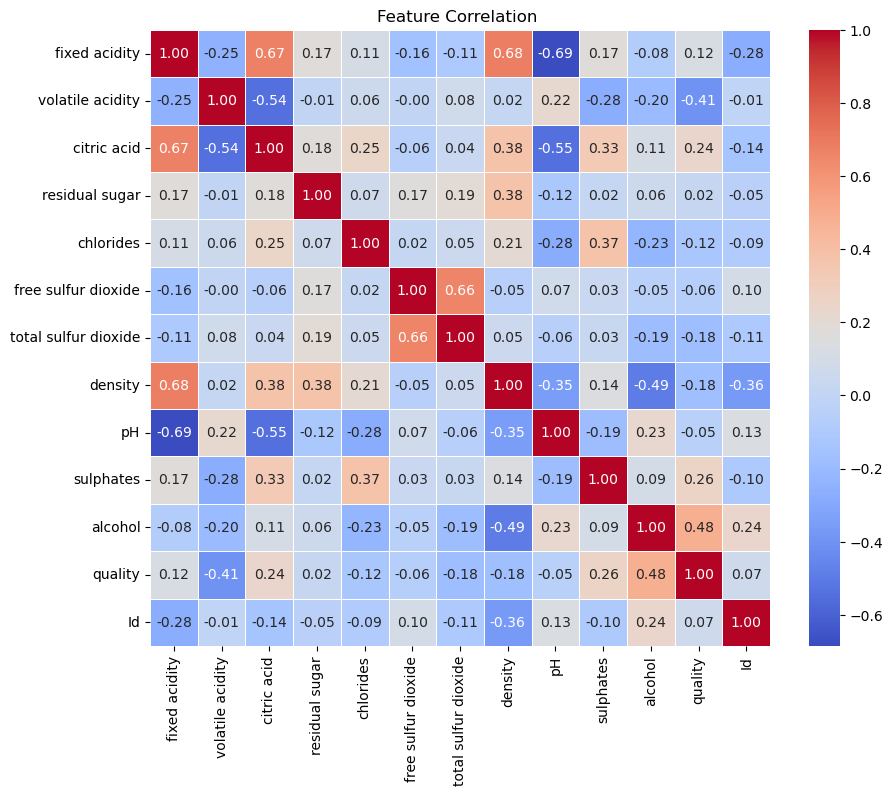

In [50]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation ")
plt.show()

In [51]:
#Group wine in classes Low: 3/5 Med: 6, High:7/10
y = df['quality']
#3rd class imbalanced -> use of SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)


In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_resampled,test_size=0.2,random_state=42)

In [54]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression:", r2_score(y_test, y_pred_lr))

X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

Linear Regression: 0.6746494471788191
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     692.7
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:40:00   Log-Likelihood:                -3225.1
No. Observations:                2318   AIC:                             6466.
Df Residuals:                    2310   BIC:                             6512.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

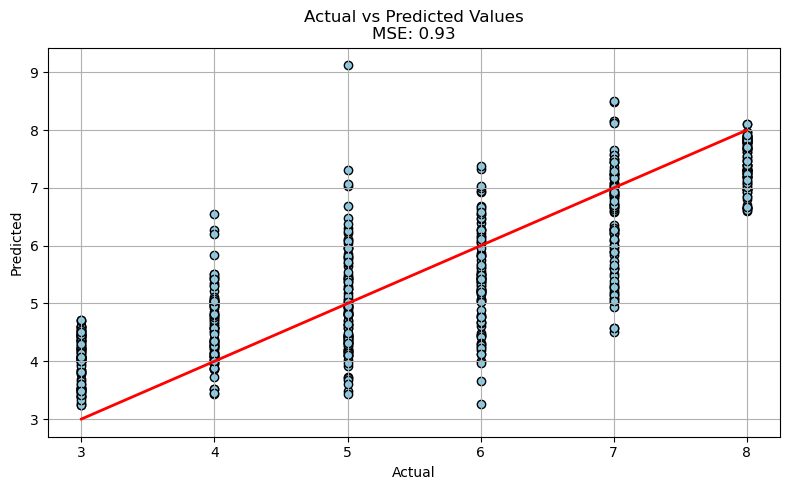

In [55]:
mse = mean_squared_error(y_test, y_pred_lr)
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred_lr,color="skyblue",edgecolors="black")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title(f'Actual vs Predicted Values\nMSE: {mse:.2f}')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

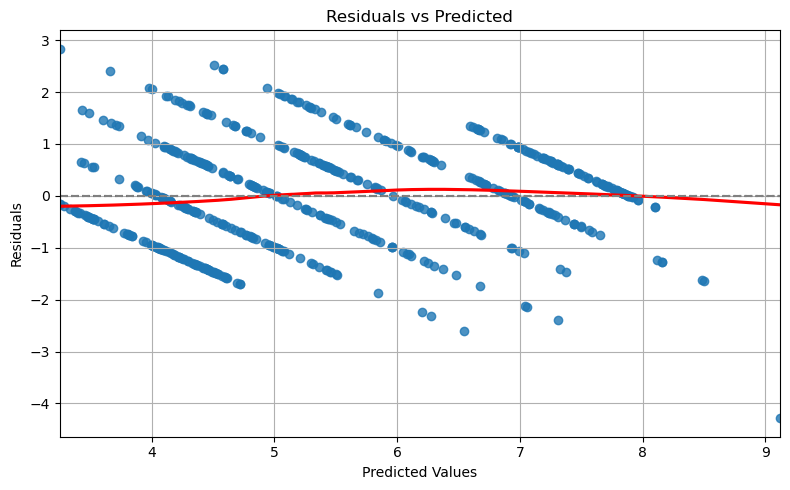

In [56]:
residuals = y_test - y_pred_lr

# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred_lr, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

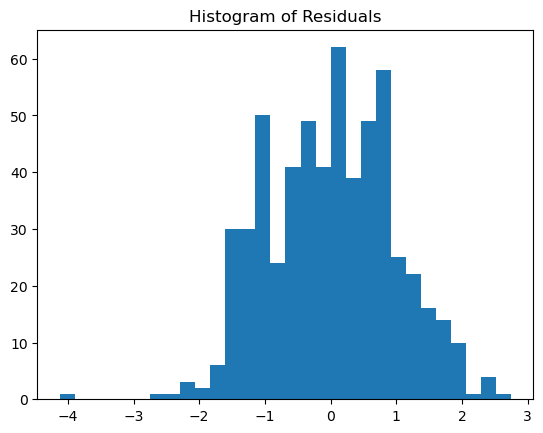

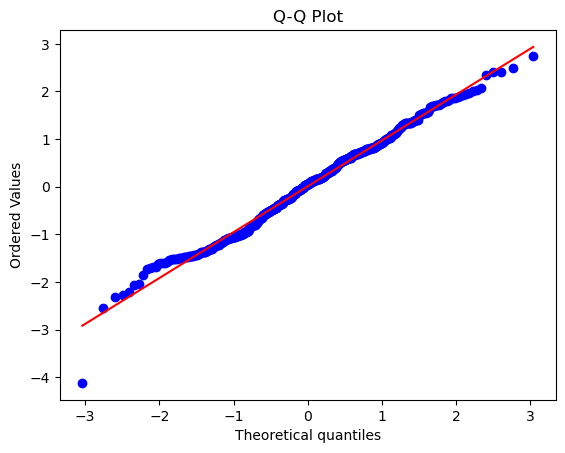

In [58]:
# Histogram
plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()